## Import section

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from random import gauss

In [2]:
df = pd.read_csv('Data/train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


## Let's look at the data first

In [3]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [4]:
df.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

### The 'Sex' column can be simplified for the analysis

In [5]:
df['Sex'].replace(['male','female'],[0,1], inplace=True)

### Let's look at the Age column, it has a lot of missing values

In [6]:
df.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

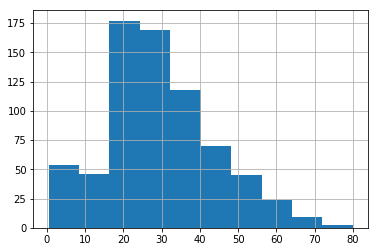

In [7]:
df.Age.hist()

count    891.000000
mean      29.667887
std       14.627275
min        0.420000
25%       20.000000
50%       28.000000
75%       39.000000
max       80.000000
Name: Age, dtype: float64

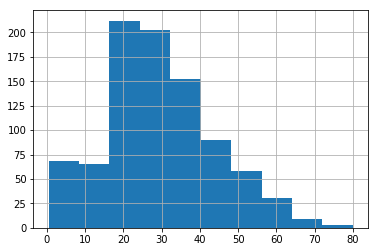

In [8]:
def add_data_age(df): 
    age_m = df.Age.mean()
    age_std = df.Age.std()
    nb_age_null = len(df[df.Age.isnull()])
    new_age = np.random.normal(age_m, age_std, nb_age_null)
    new_age = [max(min(x, 80), 0.42) for x in new_age]
    df.loc[df.Age.isnull(), 'Age'] = new_age
    return df

def remove_data_age():
    df.dropna(subset=['Age'], inplace=True)
    
df = add_data_age(df)
display(df.Age.describe())
df.Age.hist()

### Drop the 2 passengers for which we don't know the port they embarked

In [9]:
df['Embarked'].fillna(('S'), inplace=True)
#df['Embarked'] = df['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [10]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    0  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0   
2                             Heikkinen, Miss. Laina    1  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1      0   
4                           Allen, Mr. William Henry    0  35.0      0      0   

             Ticket     Fare Cabin Embarked  
0         A/5 21171   7.2500   NaN        S  
1          PC 17599  71.2833   C85        C  
2  STON/O2. 3101282   7.9250   NaN        S  
3            113803  53.1000  C123        S  
4            373450   8.0500   NaN        S

###  Adding features

In [11]:
df['Title'] = df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

df['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare', inplace=True)
df['Title'].replace(['Mlle','Ms','Mme'],['Miss','Miss','Mrs'], inplace=True)

df['Title'] = df['Title'].map({"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5})

In [12]:
df['Fare'].fillna(np.mean(df['Fare']), inplace=True)
df['Categorical_Fare'] = pd.qcut(df['Fare'], 5, labels=False)

In [13]:
df['Categorical_Age'] = pd.cut(df['Age'], 6, labels=False)

In [14]:
df['Name_Length'] = df['Name'].apply(len)

In [15]:
df['Has_Cabin'] = df["Cabin"].apply(lambda x: 0 if type(x) == float else 1)

In [16]:
df['Family_Size'] = df['SibSp'] + df['Parch'] + 1
df['Is_Alone'] = 0
df.loc[df['Family_Size'] == 1, 'Is_Alone'] = 1

In [17]:
column_drop = ['Ticket', 'Name', 'Cabin', 'Fare', 'PassengerId']
df = df.drop(columns=column_drop)
df.head()

Survived  Pclass  Sex   Age  SibSp  Parch Embarked  Title  \
0         0       3    0  22.0      1      0        S      1   
1         1       1    1  38.0      1      0        C      3   
2         1       3    1  26.0      0      0        S      2   
3         1       1    1  35.0      1      0        S      3   
4         0       3    0  35.0      0      0        S      1   

   Categorical_Fare  Categorical_Age  Name_Length  Has_Cabin  Family_Size  \
0                 0                1           23          0            2   
1                 4                2           51          1            2   
2                 1                1           22          0            1   
3                 4                2           44          1            2   
4                 1                2           24          0            1   

   Is_Alone  
0         0  
1         0  
2         1  
3         0  
4         1

# Data analysis

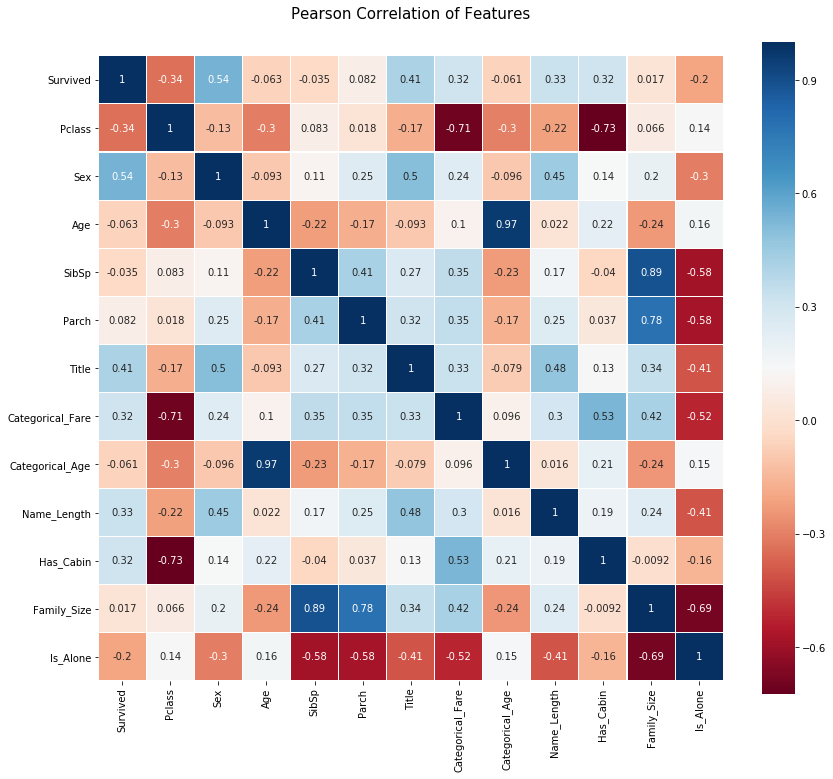

In [18]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))

plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df.drop('Embarked', axis=1).astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)
plt.savefig('Pearson_heatmap')

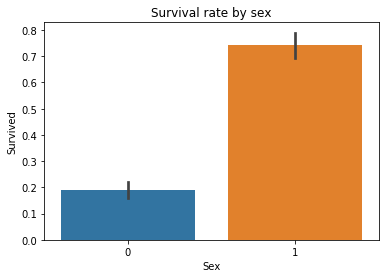

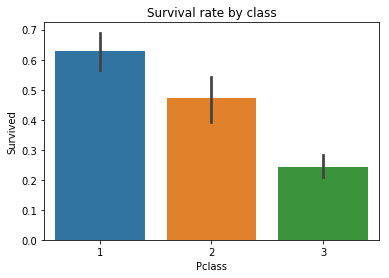

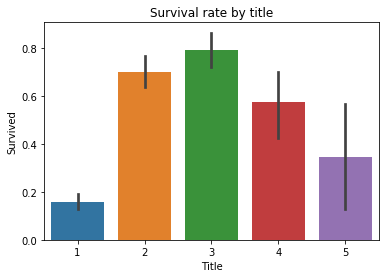

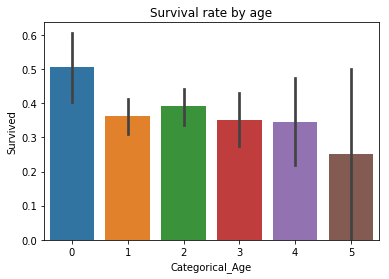

In [26]:
sns.barplot(x= 'Sex',y='Survived', data=df)
plt.title('Survival rate by sex')
plt.savefig('sex_barplot')
plt.show()
sns.barplot(x= 'Pclass',y='Survived', data=df)
plt.title('Survival rate by class')
plt.savefig('Pclass_barplot')
plt.show()
sns.barplot(x= 'Title',y='Survived', data=df)
plt.title('Survival rate by title')
plt.savefig('Title_barplot')
plt.show()
sns.barplot(x= 'Categorical_Age',y='Survived', data=df)
plt.title('Survival rate by age')
plt.savefig('Age_barplot')
plt.show()

/home/eisti/anaconda3/envs/ML/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/eisti/anaconda3/envs/ML/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/eisti/anaconda3/envs/ML/lib/python3.6/site-packages/seaborn/axisgrid.py:720: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


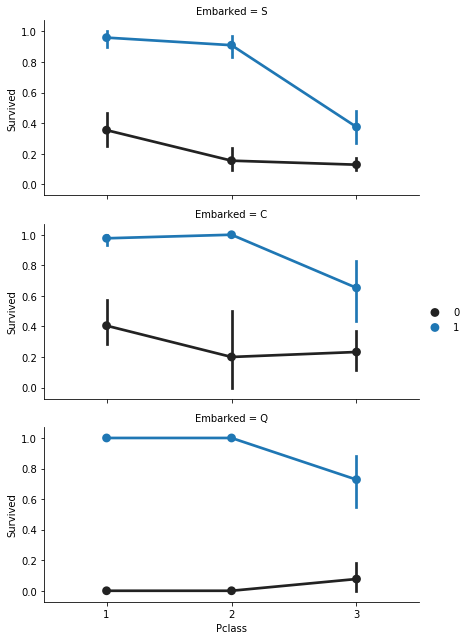

In [29]:
grid = sns.FacetGrid(df, row='Embarked', size=3, aspect=2)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex')
grid.add_legend()

plt.savefig('Pclass_sex_embarked')

# ML stuff

### ML import 

In [21]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold, train_test_split
from sklearn.naive_bayes import GaussianNB

In [22]:
features = pd.get_dummies(df.drop(columns=['Survived', 'Name']))
label = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.20, random_state=13)

nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)
nb_clf.score(X_test, y_test)

KeyError: "['Name'] not found in axis"